In [166]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from scipy.optimize import curve_fit
import math
import numba as nb
from testing_sample import *

In [167]:
#create class element - aparature
ap = Data_file(-1)

#create class element - sample
f = Data_file(0)
f.read_data_of_hkl()


In [168]:
f.del_bac_counts(delete_bac(f.counts,f.counts_bac))
f.find_counts_of(find_index_of_two_theta(f.two_theta,f.theta_start,f.step))
print(f.two_theta_in_counts)
print(f.two_theta)
f.without_ap(delete_aparature(f.counts,f.counts_bac,f.x,ap.counts,ap.x,ap.step))

[  98  451  611  660  839  961 1149 1254 1422 1518 1549 1673 1764 1794
 1912 2000 2145 2232 2376 2463 2492 2609 2699 2728 2850 2943 2975 3104]
[ 18.2835  30.0743  35.4233  37.0544  43.0505  47.1354  53.4069  56.9313
  62.5158  65.7311  66.7844  70.9205  73.9548  74.9556  78.9155  81.8496
  86.6961  89.5905  94.4157  97.3238  98.297  102.2171 105.1947 106.1962
 110.2575 113.3735 114.4282 118.7419]


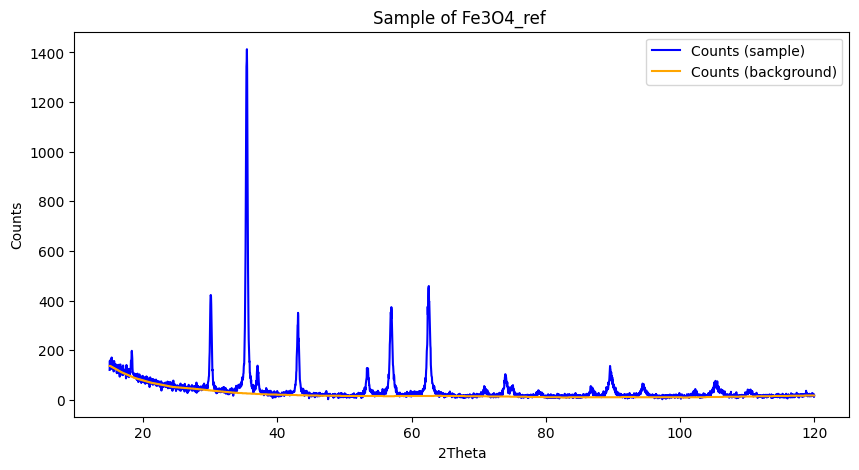

In [169]:
plot_sample__bac(f.counts,f.counts_bac,f.name,f.x,True)

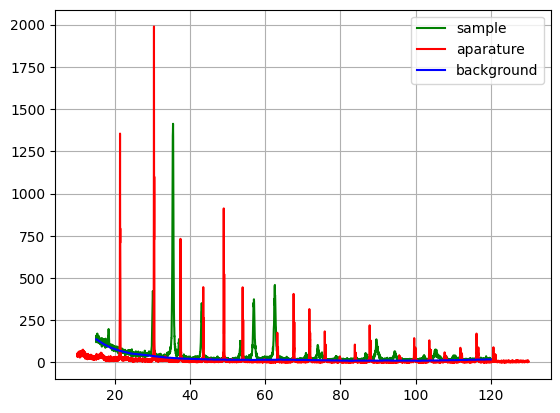

In [170]:
plt.plot(f.x,f.counts,color = "green",label = "sample")
plt.plot(ap.x,ap.counts,color = "red",label = 'aparature')
plt.plot(f.x,f.counts_bac,color = 'blue',label = "background")
plt.legend()
plt.grid(True)
plt.show()

Plot all counts


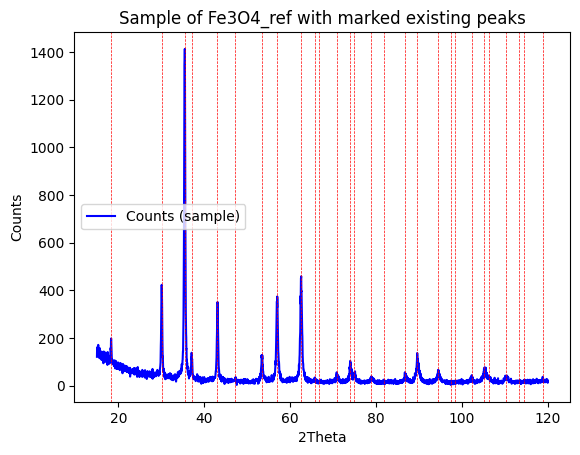

Plot without background counts


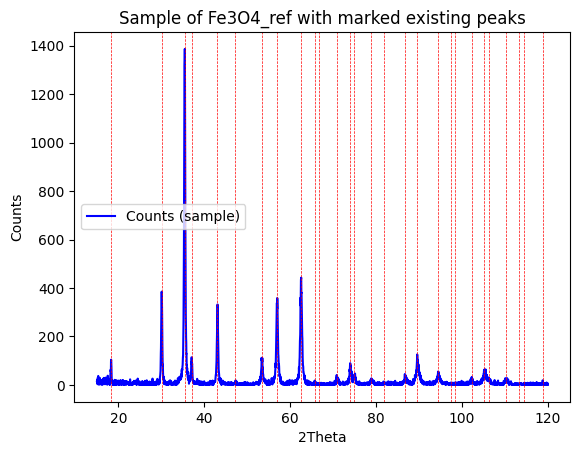

Plot without background and aparature counts


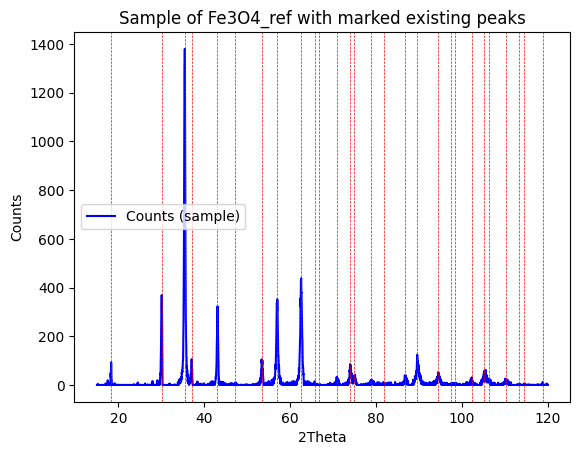

In [171]:
print("Plot all counts")
plot_with_theta_sample(f.counts,f.name,f.two_theta,f.x)
print("Plot without background counts")
plot_with_theta_sample(f.without_bac_counts,f.name,f.two_theta,f.x)
print("Plot without background and aparature counts")
plot_with_theta_sample(f.without_aparature_counts,f.name,f.two_theta,f.x)

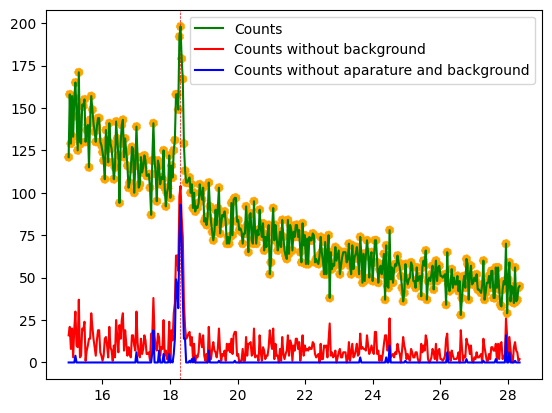

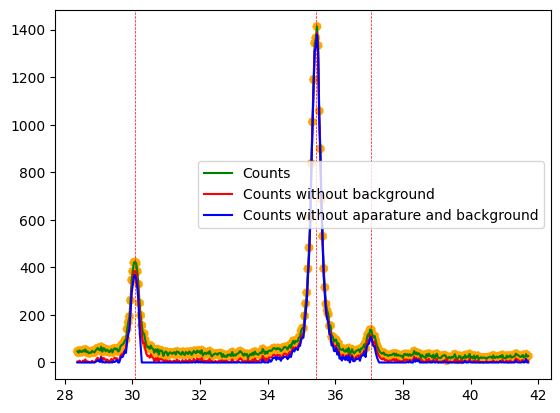

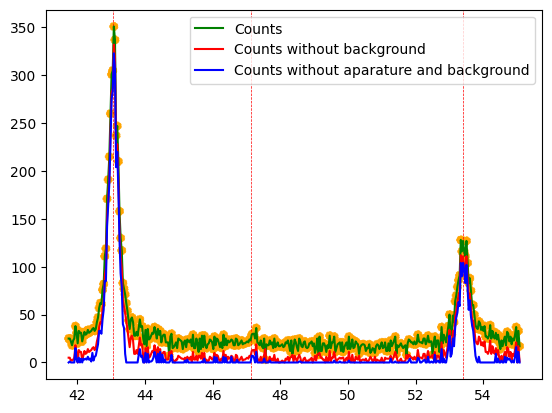

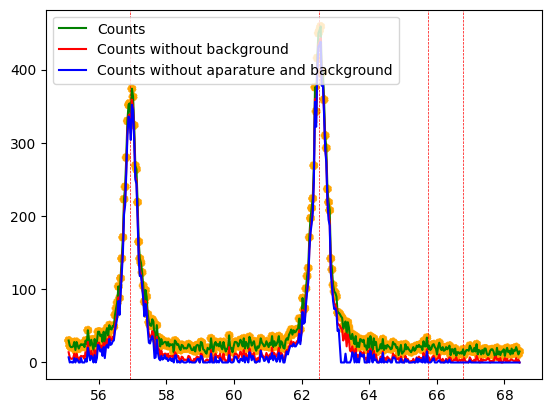

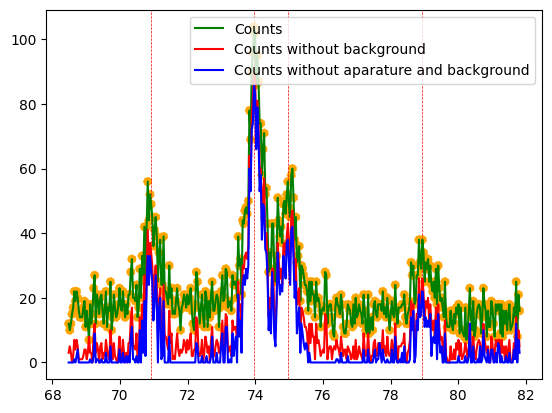

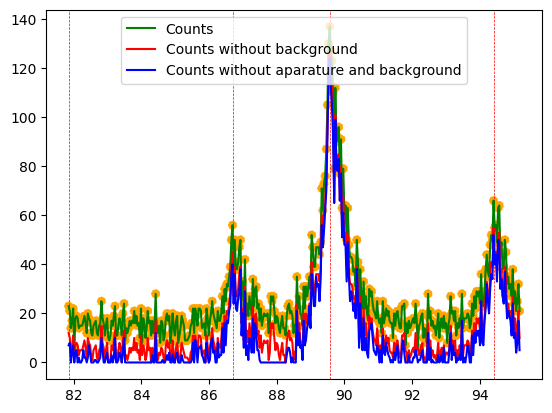

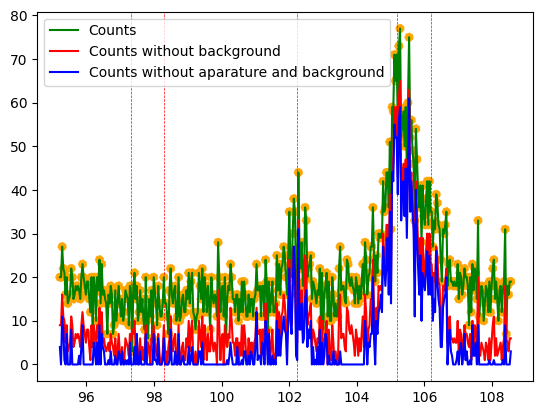

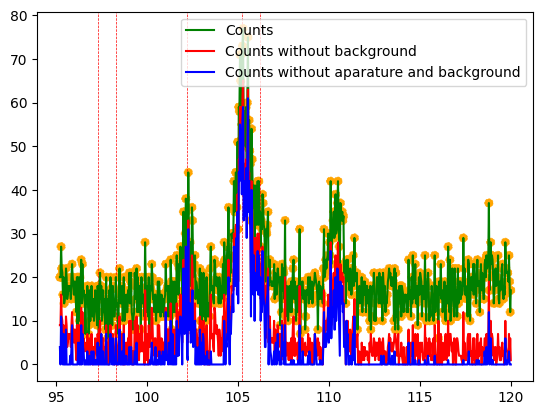

In [172]:
checking_part_of_plot(f.counts,f.without_bac_counts,f.without_aparature_counts,f.two_theta,f.x,400)


In [173]:
counts_in_peak  = counts_of_peak_in_index(f.counts,f.two_theta_in_counts)
print(min(counts_in_peak))
print(max(counts_in_peak ))
print((f.two_theta_in_counts))

16.0
1365.0
[  98  451  611  660  839  961 1149 1254 1422 1518 1549 1673 1764 1794
 1912 2000 2145 2232 2376 2463 2492 2609 2699 2728 2850 2943 2975 3104]


In [174]:
#parameters to calculate stain and size of cristalite
print(f.xy_and_u_fitted)

[0.42234, 0.00771505, 0.08509, 0.00285621]


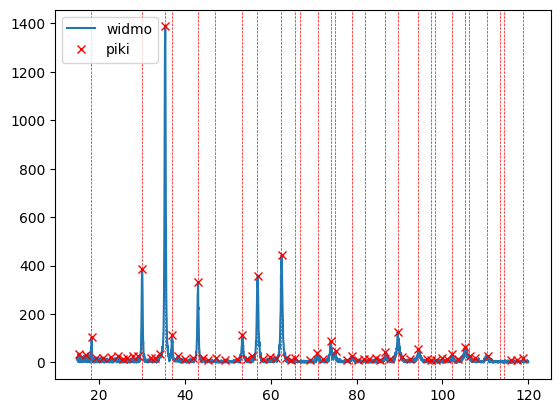

69
[np.float64(15.303914111575931), np.float64(17.008463547172873), np.float64(18.311942527335244), np.float64(19.448308817733206), np.float64(21.052590639471504), np.float64(22.72371753711557), np.float64(24.495112048618275), np.float64(25.564633263110473), np.float64(26.60073193964979), np.float64(27.937633457765045), np.float64(29.073999748163004), np.float64(30.07667588674944), np.float64(32.04860562596944), np.float64(33.184971916367395), np.float64(34.28791566881248), np.float64(35.45770449716333), np.float64(37.028563780948744), np.float64(38.33204276111111), np.float64(39.96974712080229), np.float64(41.941676860022284), np.float64(43.07804315042025), np.float64(44.281254516723976), np.float64(45.417620807121935), np.float64(47.28928293248328), np.float64(49.461747899420565), np.float64(52.0687058597453), np.float64(53.33876230195479), np.float64(54.374860978494105), np.float64(55.67833995865648), np.float64(56.98181893881885), np.float64(58.251875381028334), np.float64(59.85615

In [175]:
# wykrywanie pików

from scipy.signal import find_peaks
peaks, dict = find_peaks(f.without_bac_counts, height=10, distance=30)

for i in range(len(f.two_theta)):
        plt.axvline(f.two_theta[i], color='red', linestyle='--', linewidth=0.5)
plt.plot(f.x, f.without_bac_counts, label='widmo')
plt.plot(f.x[peaks], f.without_bac_counts[peaks], 'rx', label='piki')
plt.legend()
plt.show()

p,c=[],[]
print(len(peaks))
for i in peaks:
    p.append(f.x[i])
print(p)
print(f.two_theta)
print(len(f.two_theta))
print(dict)
# for i in two_theta:
#     c.append(f.without_bac_counts[])
# print(c)

In [176]:
def plot_gauss(correct_peaks,peaks,count,x,two_theta,segment_width = 15):
    x_min = np.min(x)
    x_max = np.max(x)
    # szerokość segmentu (np. 20° 2θ)
    num_segments = int(np.ceil((x_max - x_min) / segment_width))
    print(f"\nTworzę {num_segments} wykresów (co {segment_width}° 2θ)...")
    for seg in range(num_segments):
        seg_start = x_min + seg * segment_width
        seg_end = seg_start + segment_width
        mask = (x >= seg_start) & (x < seg_end)
        if not np.any(mask):
            continue
        x_seg = x[mask]
        y_seg = count[mask]
        plt.figure(figsize=(8, 5))
        plt.plot(x_seg, y_seg, label='Dane (po baseline)', alpha=0.6)
        local_peaks = [pk for pk in peaks if seg_start <= x[pk] < seg_end]
        plt.scatter(x[local_peaks], count[local_peaks], color='k', zorder=10, label='Piki')
        local_corr_peaks = [pk for pk in correct_peaks if seg_start <= x[pk] < seg_end]
        plt.scatter(x[local_corr_peaks], count[local_corr_peaks], color='red', zorder=10, label='Piki poprawne')
        for i in range(len(two_theta)):
            plt.axvline(two_theta[i], color='red', linestyle='--', linewidth=0.5)
        plt.xlim(seg_start, seg_end)
        plt.ylim(y_seg.min() * 0.9, y_seg.max() * 1.1)
        plt.title(f'Dopasowanie Gaussów: {seg_start:.1f}–{seg_end:.1f}° 2θ')
        plt.xlabel('2θ [°]')
        plt.ylabel('Intensywność')
        plt.legend(fontsize=8)
        plt.tight_layout()
        plt.show()


In [177]:
def checking_what_found(peaks,counts,correct_peaks,two_theta,x):
    plt.plot(two_theta,counts[two_theta])


In [198]:
def which_was_found(correct_peaks, x, counts, two_theta, two_theta_in_counts):
    plt.plot(x, counts, color="orange")
    plt.scatter(x[correct_peaks], counts[correct_peaks], color="red",label = "znalezione piki")
    plt.scatter(two_theta, counts[two_theta_in_counts],label = "piki, które powinny zostać znalezione")
    plt.legend()
    plt.show()

    eps = [0, 1, 2, 3, -1, -2, -3]
    find_peaks_theta = []
    not_find_peaks = []
    correct_peaks_set = set(correct_peaks)
    for idx in two_theta_in_counts:
        matched = any((idx + e) in correct_peaks_set for e in eps)
        if matched:
            find_peaks_theta.append(idx)
        else:
            not_find_peaks.append(idx)

    # plt.plot(x, counts, color="orange")
    plt.title("znalezione")
    plt.scatter(
        x[find_peaks_theta],
        counts[find_peaks_theta],
        label=fr"znaleziono: {len(find_peaks_theta)} spośród {len(two_theta)} z dokładnością do 3pkt",
        color = "red"
    )
    plt.legend()
    plt.show()
    # plt.title("nie znalezione")
    # plt.plot(x, counts, color="orange")
    plt.scatter(
        x[not_find_peaks],
        counts[not_find_peaks],
        label=fr"nie znaleziono: {len(not_find_peaks)} spośród {len(two_theta)} z dokładnością do 3pkt"
    )
    plt.legend()
    plt.show()


In [199]:
def peak_detect(counts, x, heigh, dist, prom, two_theta,theta_start, step, eps = 4, plotting=False,fitting = False,fit_range = 10):
    ''' If fitting = False - function return values:
    len(peaks),len(correct_peaks)/len(two_theta),heigh,dist,prom ;
    If fitting = True - function return values:
    peaks,correct_peaks,index_corrected,gauss_fit,_  '''
    peaks, _ = find_peaks(counts, height=heigh, distance=dist, prominence=prom)
    if len(peaks) == 0:
        print(" Nie znaleziono pików - spróbuj obniżyć progu 'height' lub 'prominence'.")
        return False
    fitted_params,r2_list,gauss_fit  = [],[],[]  # (A, x0, sigma) dla każdego dopasowanego piku
    for pk in peaks:
        # ogranicz dane do małego okna wokół piku
        left = max(0, pk - fit_range)
        right = min(len(x), pk + fit_range)
        x_fit = x[left:right]
        y_fit = counts[left:right]
        A_guess = counts[pk]
        x0_guess = x[pk]
        sigma_guess = 1.0
        try:
            popt, _ = curve_fit(
                gaussian, x_fit, y_fit,
                p0=[A_guess, x0_guess, sigma_guess],
                bounds=([0.0, x0_guess - 5.0, 0.01],
                        [np.max(counts) * 5, x0_guess + 5.0, 10.0])
            )
            fitted_params.append(popt)
            A_fit, x0_fit, sigma_fit = popt
            # oblicz R² lokalnie
            gauss_fit.append([A_fit, x0_fit, sigma_fit])
            r2_list.append(rr2(
                np.asarray(x_fit, dtype=np.float64),
                np.asarray(y_fit, dtype=np.float64),
                np.float64(A_fit),
                np.float64(x0_fit),
                np.float64(sigma_fit)
            ))
        except RuntimeError:
            # print(f" Nie udało się dopasować Gaussa do piku przy x = {x[pk]:.2f}")
            fitted_params.append((np.nan, np.nan, np.nan))
            r2_list.append(np.nan)
    # --- Analiza poprawności względem two_theta ---
    correct_peaks,index_corrected = [],[]
    for i in range(len(two_theta)):
        for j in range(len(peaks)):
            if abs(peaks[j] - ((two_theta[i] - theta_start) / step)) < eps:
                correct_peaks.append(peaks[j])
                index_corrected.append(j)
    if plotting == True:
        plot_gauss(correct_peaks,peaks, counts, x, two_theta,30)
    if fitting == True:
        # which_was_found(peaks,x,counts,two_theta,f.two_theta_in_counts)
        # print("Wydajność wynosi: ",len(correct_peaks)/len(two_theta))
        # if len(correct_peaks)/len(two_theta)>1:
            # print(fr"Wydajność przewyższa 1, gdyż program znalazł więcej pików oddalonych o mniej niż {eps} od wartości oczekiwanych.")
        return peaks,correct_peaks,index_corrected,gauss_fit,_
    return len(peaks),len(correct_peaks)/len(two_theta),heigh,dist,prom



In [200]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2*sigma**2))

In [201]:
def finding_fwhm(counts,index_corrected,x,gauss_fit,theta_start,step,plotting = False):
    fwhm,t_fwhm,diff = [],[],[] 
    for j in range(len(index_corrected)):
        if plotting == True:
            plt.scatter(x, counts, s=10, label="dane")
            plt.plot(x, gauss(x, *gauss_fit[index_corrected[j]]), label="dopasowany Gauss", linewidth=2,color = 'red')
            plt.axvline(gauss_fit[index_corrected[j]][1])
            plt.legend()
            plt.xlim(gauss_fit[index_corrected[j]][1]-gauss_fit[index_corrected[j]][2]-1,gauss_fit[index_corrected[j]][1]+gauss_fit[index_corrected[j]][2]+1)
            plt.ylim(0,gauss_fit[index_corrected[j]][0]+100)
            plt.axhline(gauss_fit[index_corrected[j]][0]/2, color='r', linestyle='--', label='Pozioma linia')
        max_index = int((gauss_fit[index_corrected[j]][1]-theta_start)/step )
        min = abs(counts[max_index - 20]-(gauss_fit[index_corrected[j]][0]/2))
        l_ind = max_index - 20
        min2 = abs(counts[max_index]-(gauss_fit[index_corrected[j]][0]/2))
        r_ind = max_index
        for i in range(max_index - 20,max_index):
            if abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))<min:
                min=abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))
                l_ind = i
        for i in range(max_index,max_index+20):
            if abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))<min2:
                min2=abs(counts[i]-(gauss_fit[index_corrected[j]][0]/2))
                r_ind = i
        if plotting == True:
            dd = [x[l_ind],x[r_ind]]
            kk = [counts[l_ind],counts[r_ind]]
            plt.scatter(dd,kk,color ='green')
            plt.show()
        diff.append((r_ind-l_ind)*step)
        # print("FWHM = ",2*gauss_fit[index_corrected[j]][2]*math.sqrt(2*math.log(2)))
        fwhm.append(2*gauss_fit[index_corrected[j]][2]*math.sqrt(2*math.log(2)))
        t_fwhm.append(gauss_fit[index_corrected[j]][1])
    return fwhm,t_fwhm,diff

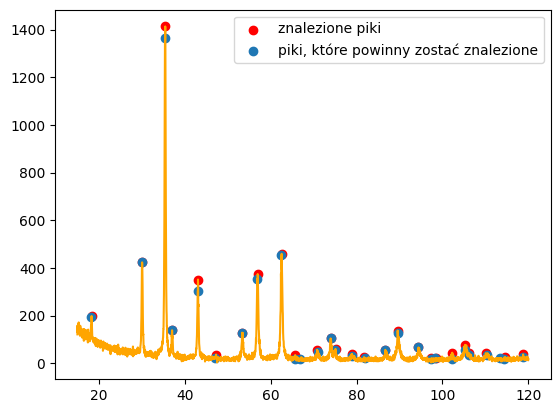

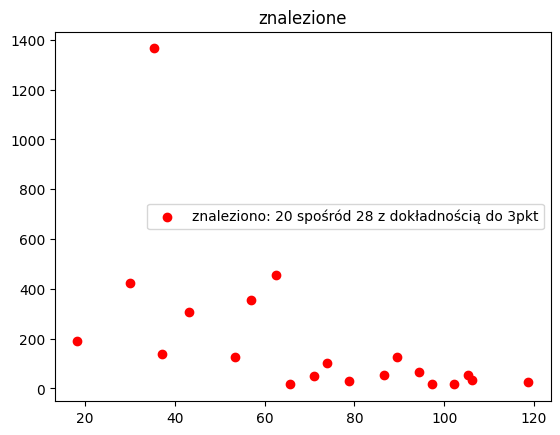

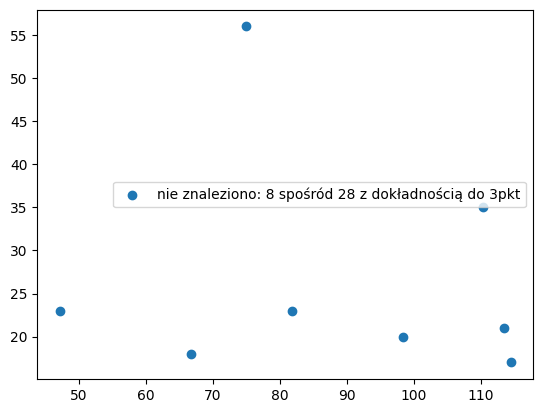

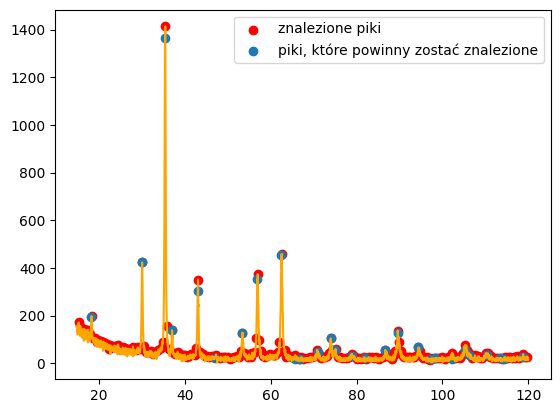

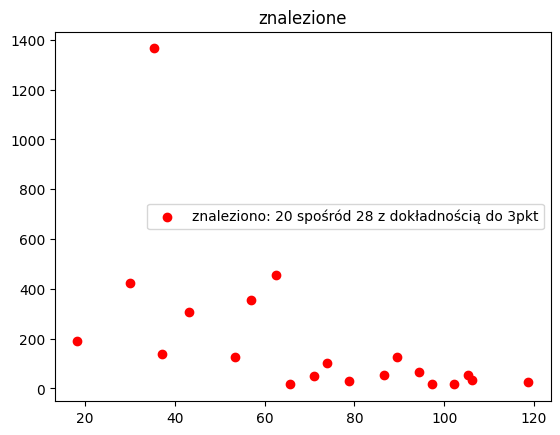

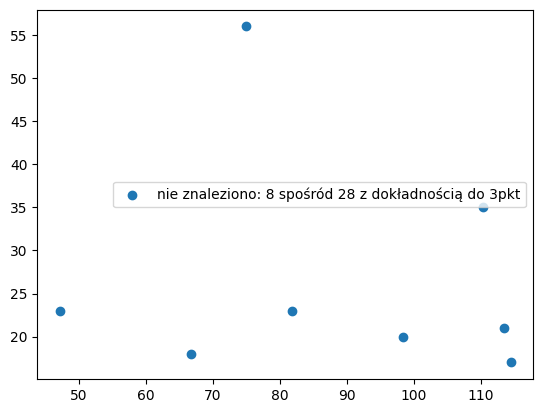

In [202]:
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(f.counts,f.x,4, 10, 0.001,f.two_theta,f.theta_start,f.step,6,False,True)
# finding_fwhm(f.counts,correct_peaks,index_corrected,f.x,gauss_fit)

which_was_found(correct_peaks,f.x,f.counts,f.two_theta,f.two_theta_in_counts)
which_was_found(peaks,f.x,f.counts,f.two_theta,f.two_theta_in_counts)



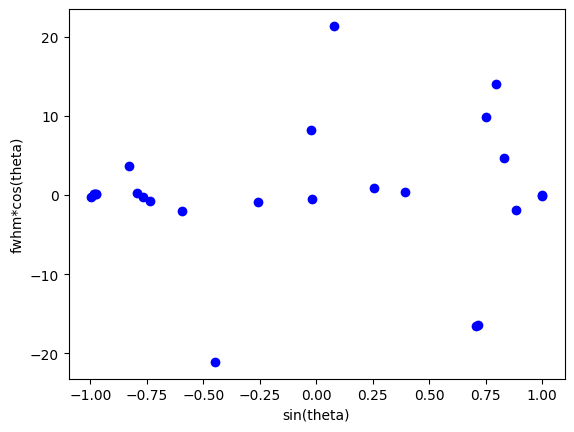

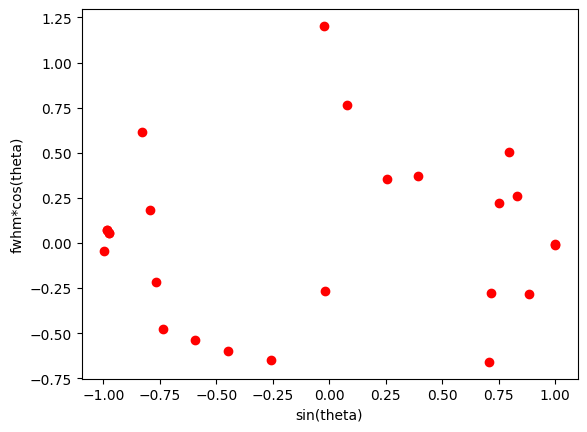

In [189]:
fwhm,t_fwhm,diff = finding_fwhm(f.without_aparature_counts,index_corrected,f.x,gauss_fit,f.theta_start,f.step)
xx,yy = [],[]
for i in range(len(fwhm)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(fwhm[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "blue")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()
xx,yy = [],[]
for i in range(len(diff)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(diff[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "red")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()

In [190]:
counts_above_40=[]
x_counts_above_40 = []
for i in range(len(f.counts)):
    if f.counts[i]>40:
        counts_above_40.append(f.counts[i])
        x_counts_above_40.append(f.x[i])
        
nr_of_step = len(counts_above_40)
# x_counts_above_40 = np.linspace(f.theta_start, f.theta_stop, nr_of_step)
if nr_of_step > 1:
    step = (f.theta_stop - f.theta_start) / (nr_of_step - 1)
else:
    step = 0.0
print(step)

0.11929567239772727


In [191]:
peaks,correct_peaks,index_corrected,gauss_fit,_ = peak_detect(counts_above_40,x_counts_above_40,0, 10, 0.001,f.two_theta,f.theta_start,step,7,False,True)


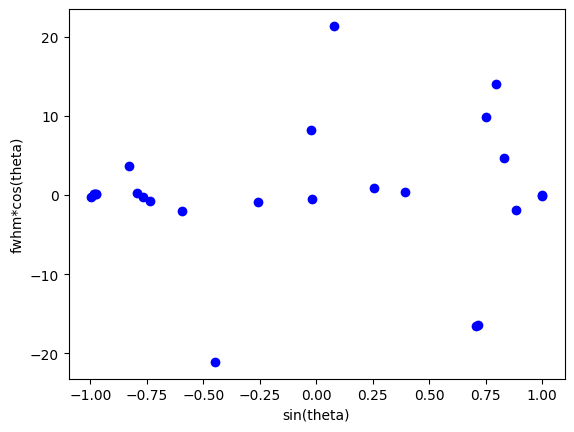

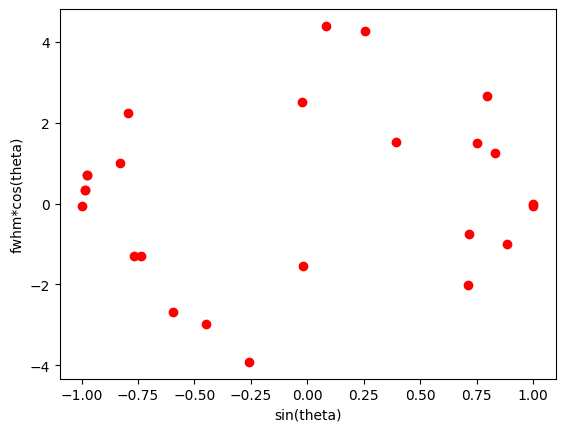

In [194]:
fwhm,t_fwhm,diff = finding_fwhm(counts_above_40,index_corrected,x_counts_above_40,gauss_fit,f.theta_start,step)
xx,yy = [],[]
for i in range(len(fwhm)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(fwhm[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "blue")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()
xx,yy = [],[]
for i in range(len(diff)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(diff[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "red")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()

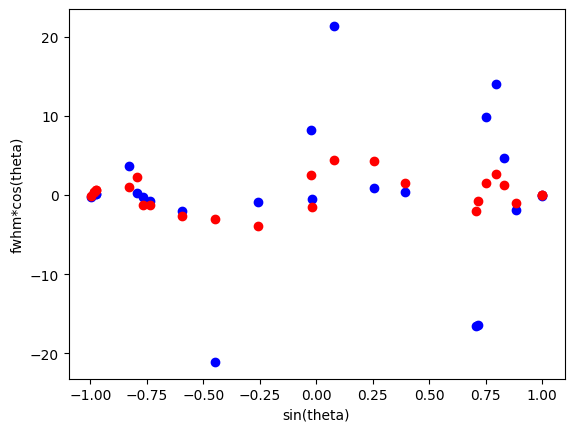

In [195]:
fwhm,t_fwhm,diff = finding_fwhm(counts_above_40,index_corrected,x_counts_above_40,gauss_fit,f.theta_start,step)
xx,yy = [],[]
for i in range(len(fwhm)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(fwhm[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "blue")
xx,yy = [],[]
for i in range(len(diff)):
    xx.append(math.sin(t_fwhm[i]))
    yy.append(diff[i]*math.cos(t_fwhm[i]))
plt.scatter(xx,yy,color = "red")
plt.xlabel("sin(theta)")
plt.ylabel("fwhm*cos(theta)")
plt.show()

In [196]:
#szkielet: 

# counts_above_40=[]
# x_counts_above_40 = []
# for i in range(len(f.counts)):
#     if f.counts[i]>40:
#         counts_above_40.append(f.counts[i])
#         x_counts_above_40.append(f.x[i])
        
# nr_of_step = len(counts_above_40)
# # x_counts_above_40 = np.linspace(f.theta_start, f.theta_stop, nr_of_step)
# if nr_of_step > 1:
#     step = (f.theta_stop - f.theta_start) / (nr_of_step - 1)
# else:
#     step = 0.0


# popt, pcov = curve_fit(gauss,x_counts_above_40, counts_above_40, p0=[max(counts_above_40), x_counts_above_40[np.argmax(counts_above_40)], 1])
# A, mu, sigma = popt
# # wykres
# plt.scatter(f.x, f.counts, s=10, label="dane")
# plt.plot(f.x, gauss(f.x, *popt), label="dopasowany Gauss", linewidth=2,color = 'red')
# plt.axvline(mu)
# plt.legend()
# plt.xlim(mu-sigma-1,mu+sigma+1)
# plt.axhline(A/2, color='r', linestyle='--', label='Pozioma linia')

# print(max(A * np.exp(-(f.x - mu)**2 / (2*sigma**2))))
# print(A/2)
# print(f.step)
# print((mu-f.theta_start)/f.step )

# print(f.x[int((mu-f.theta_start)/f.step)])

# for i in range(598,611):
#     # print(f.counts[i])
#     if abs(f.counts[i]-(A/2))<100:
#         print(f.counts[i]-(A/2))
#         print(i)
# for i in range(611,626):
#     # print(f.counts[i])
#     if abs(f.counts[i]-(A/2))<100:
#         print(f.counts[i]-(A/2))
#         print(i)
# print((616-606)*f.step)
# print(f.step)
# dd = [f.x[606],f.x[616]]
# kk = [f.counts[606],f.counts[616]]
# # # for i in range(len(f.counts)):
# # #     if f.counts[i]
# # for i in range(len(f.counts)):
# #     if (mu-f.theta_start)/f.step 
# plt.scatter(dd,kk,color ='green')
# plt.show()
